In [25]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
#random.seed(0)

#np.random.seed(0)

#torch.manual_seed(0)
#torch.backends.cudnn.deterministic = True
#torch.backends.cudnn.benchmark = False

import os

#os.environ['CUDNN_DETERMINISTIC'] = '1'
#os.environ['CUDNN_BENCHMARK'] = '0'

In [26]:
data = pd.read_csv("raw_data.csv", delimiter=";")

In [27]:
data.head()

,Year,Transistors,Clock (MHz),Power Density (W/cm²),Cores
0,1971,2300,0.74,3.750000,1
1,1974,4500,2.00,3.900000,1
2,1976,6500,3.00,4.450000,1
3,1978,29000,5.00,5.666667,1
4,1979,29000,5.00,5.151515,1


In [28]:
data.drop(["Cores","Clock (MHz)", "Power Density (W/cm²)"], axis=1, inplace = True)

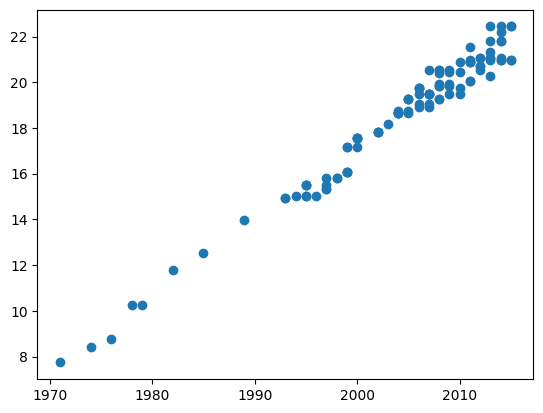

In [29]:
# 2 runs; first without standardisation; second with standardization
X = np.array(data["Year"])
y = np.array(data["Transistors"])
log_y = np.log(y)
plt.scatter(X,log_y)

In [30]:
inputs = torch.from_numpy(X.reshape(-1,1).astype(np.float32))
targets = torch.from_numpy(log_y.reshape(-1,1).astype(np.float32))

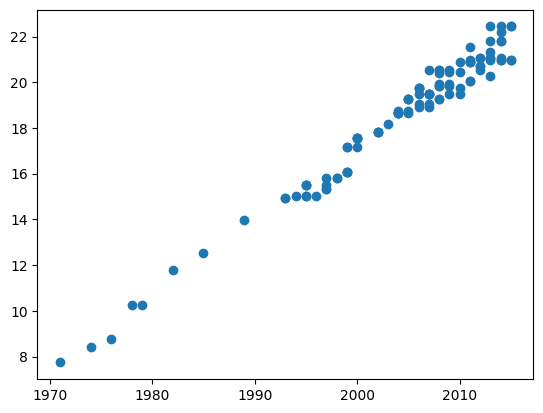

In [31]:
plt.scatter(inputs,targets)

In [51]:
lin_model1 = nn.Linear(1,1)


In [52]:
criterion = nn.MSELoss(reduce="mean")
optimizer = torch.optim.SGD(lin_model1.parameters(), lr = 0.001)

In [53]:
epoches = 900
losses = []
for i in range(epoches):
  optimizer.zero_grad()
  out = lin_model1(inputs)
  loss = criterion(out, targets)
  losses.append(loss.item())
  loss.backward()
  optimizer.step()

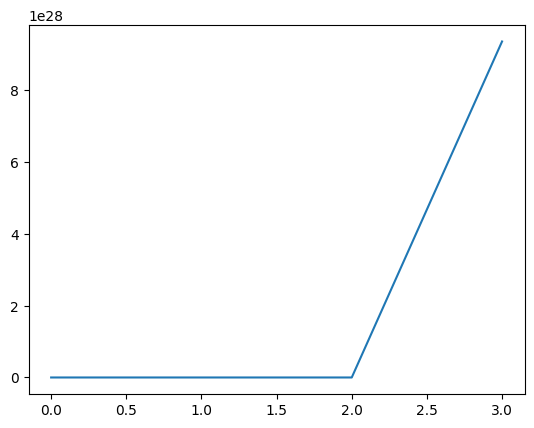

In [54]:
plt.plot(losses)

In [55]:
lin_model1(inputs)

tensor([[nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [n

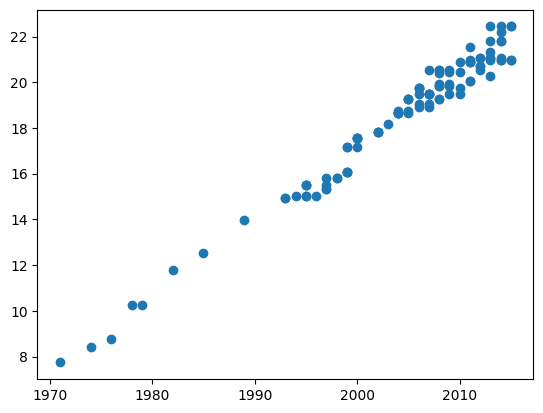

In [56]:
plt.plot(inputs, lin_model1(inputs).detach().numpy(), color='r')
plt.scatter(inputs,targets)

In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_1 = data.copy()
sc.fit(data_1)


StandardScaler()

In [58]:
data_1["Transistors"] = np.log(data_1["Transistors"])

In [59]:
df = sc.transform(data_1)

In [60]:
X = df[:,0]
y = df[:,1]

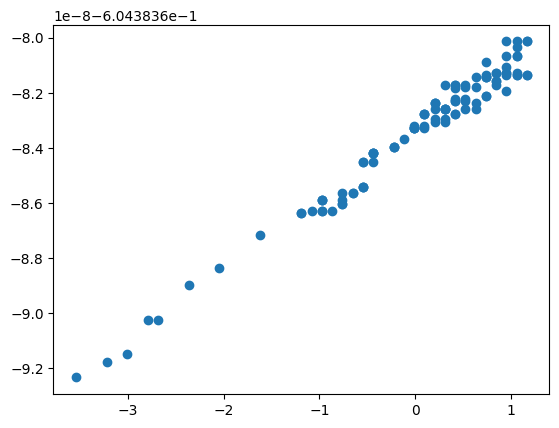

In [61]:
plt.scatter(X,y)

In [62]:
lin_model = nn.Linear(1,1)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(lin_model1.parameters(), lr = 0.000000001)

In [63]:
inputs = torch.from_numpy(X.reshape(-1,1).astype(np.float32))
targets = torch.from_numpy(y.reshape(-1,1).astype(np.float32))
epoches = 500
losses = []
for i in range(epoches):
  optimizer.zero_grad()
  out = lin_model(inputs)
  loss = criterion(out, targets)
  losses.append(loss.item())
  loss.backward()
  optimizer.step()

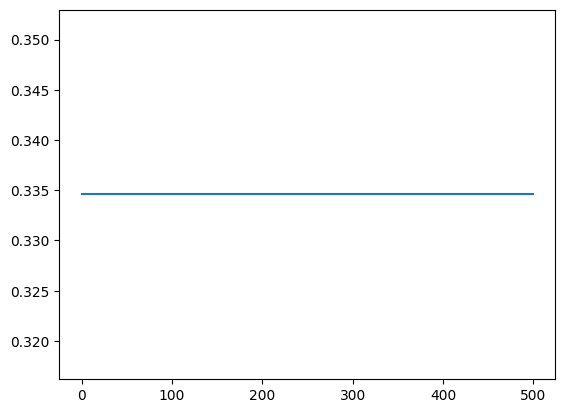

In [64]:
plt.plot(losses)

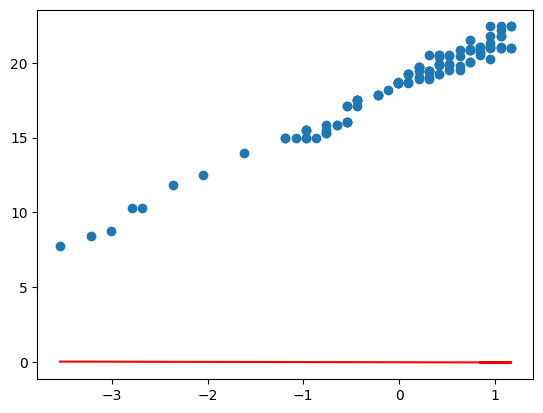

In [65]:
plt.plot(X, lin_model(inputs).detach().numpy(), color='r')
plt.scatter(X,log_y)

In [23]:
losses

[2.1096808910369873,
 2.1096808910369873,
 2.1096808910369873,
 2.1096808910369873,
 2.1096808910369873,
 2.1096808910369873,
 2.1096808910369873,
 2.1096808910369873,
 2.1096808910369873,
 2.1096808910369873,
 2.1096808910369873,
 2.1096808910369873,
 2.1096808910369873,
 2.1096808910369873,
 2.1096808910369873,
 2.1096808910369873,
 2.1096808910369873,
 2.1096808910369873,
 2.1096808910369873,
 2.1096808910369873,
 2.1096808910369873,
 2.1096808910369873,
 2.1096808910369873,
 2.1096808910369873,
 2.1096808910369873,
 2.1096808910369873,
 2.1096808910369873,
 2.1096808910369873,
 2.1096808910369873,
 2.1096808910369873,
 2.1096808910369873,
 2.1096808910369873,
 2.1096808910369873,
 2.1096808910369873,
 2.1096808910369873,
 2.1096808910369873,
 2.1096808910369873,
 2.1096808910369873,
 2.1096808910369873,
 2.1096808910369873,
 2.1096808910369873,
 2.1096808910369873,
 2.1096808910369873,
 2.1096808910369873,
 2.1096808910369873,
 2.1096808910369873,
 2.1096808910369873,
 2.1096808910